In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Visualization Settings
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# Load the dataset
file_path = '../data/processed/cleaned_data.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64800 entries, 0 to 64799
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               64800 non-null  object
 1   ScheduledDay         64800 non-null  object
 2   AppointmentDay       64800 non-null  object
 3   Age                  64800 non-null  int64 
 4   Neighbourhood        64800 non-null  object
 5   Scholarship          64800 non-null  int64 
 6   Hipertension         64800 non-null  int64 
 7   Diabetes             64800 non-null  int64 
 8   Alcoholism           64800 non-null  int64 
 9   Handcap              64800 non-null  int64 
 10  SMS_received         64800 non-null  int64 
 11  No-show              64800 non-null  int64 
 12  waiting_days         64800 non-null  int64 
 13  appointment_weekday  64800 non-null  object
dtypes: int64(9), object(5)
memory usage: 6.9+ MB


In [6]:
for col in ['ScheduledDay','AppointmentDay']:
    df[col] = pd.to_datetime(df[col])

In [7]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days,appointment_weekday
0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,Friday
1,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,Friday
2,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,Friday
3,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,Friday
4,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1,Friday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64800 entries, 0 to 64799
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Gender               64800 non-null  object             
 1   ScheduledDay         64800 non-null  datetime64[ns, UTC]
 2   AppointmentDay       64800 non-null  datetime64[ns, UTC]
 3   Age                  64800 non-null  int64              
 4   Neighbourhood        64800 non-null  object             
 5   Scholarship          64800 non-null  int64              
 6   Hipertension         64800 non-null  int64              
 7   Diabetes             64800 non-null  int64              
 8   Alcoholism           64800 non-null  int64              
 9   Handcap              64800 non-null  int64              
 10  SMS_received         64800 non-null  int64              
 11  No-show              64800 non-null  int64              
 12  waiting_days      

In [9]:
df['No-show'].value_counts(normalize=True) * 100

No-show
0    70.896605
1    29.103395
Name: proportion, dtype: float64

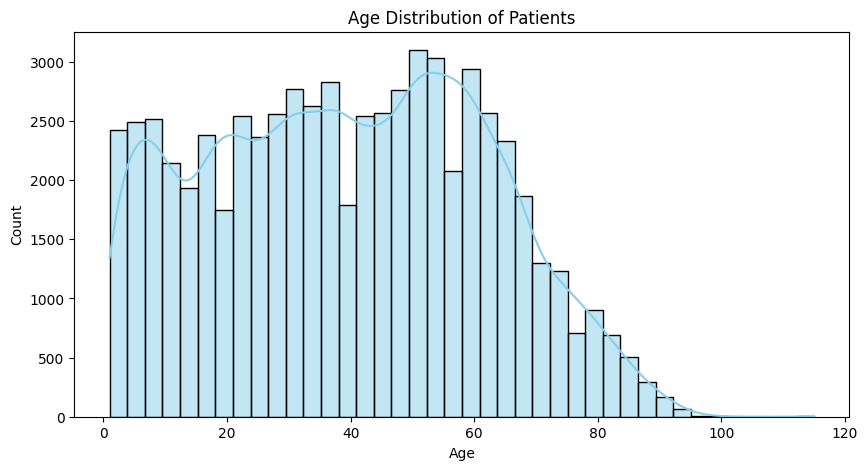

In [10]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=40, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


The __largest portion of patients__ falls rougly betweeen the __20 and 60 years old__ - __the middle age group__

The count __declines sharply after 60__, indicating __fewer elderly patients__.


C:\Users\owais\AppData\Local\Temp\ipykernel_19624\3582310000.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_noshow = df.groupby('AgeGroup')['No-show'].mean().reset_index()


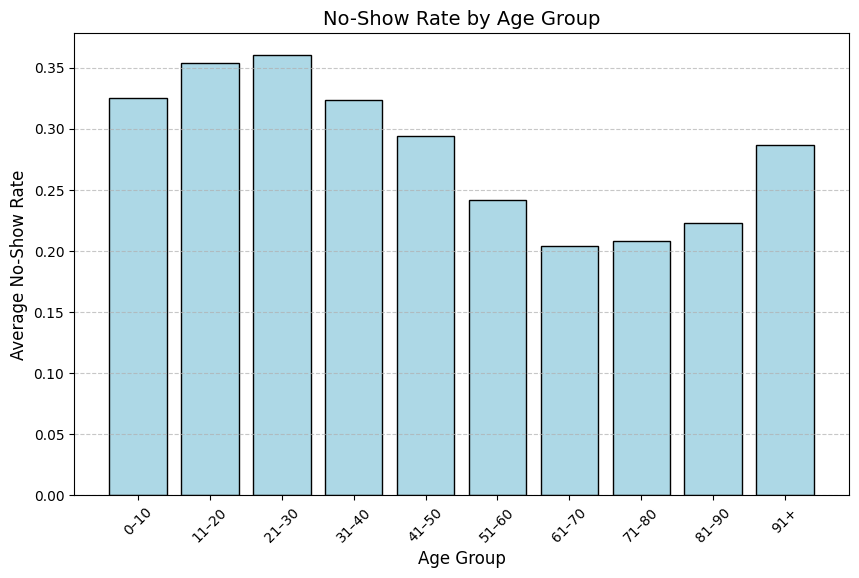

In [15]:
# Define bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90', '91+']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Compute no-show rate by age group
agegroup_noshow = df.groupby('AgeGroup')['No-show'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(agegroup_noshow['AgeGroup'], agegroup_noshow['No-show'], color='lightblue', edgecolor='black')
plt.title('No-Show Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average No-Show Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


__Extreme age groups (children & elderly)__ do show __higher no-show rates__.

__Middle-aged groups (40–70)__ are the most reliable attendees.

The __highest no-show rates__ are among __younger populations (11–30)__, suggesting that interventions like reminders, flexible scheduling, or awareness campaigns could reduce missed appointments in that demographic.

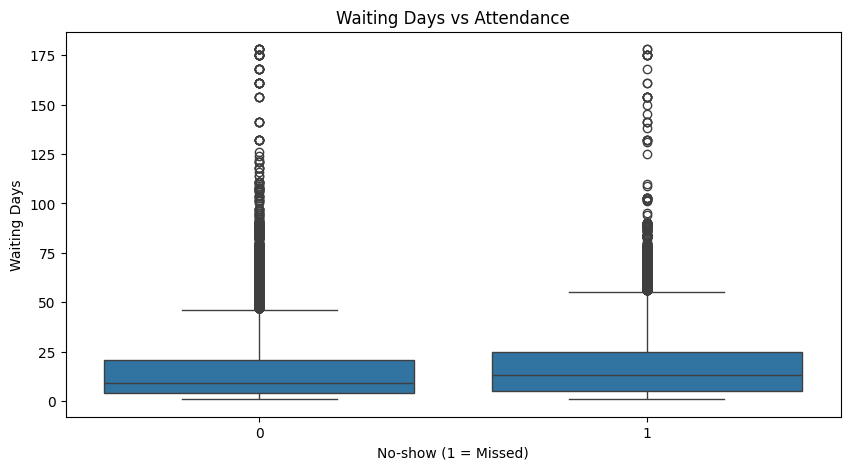

In [25]:
# Waiting Days vs Attendance

plt.figure(figsize=(10,5))
sns.boxplot(x='No-show', y='waiting_days', data=df)
plt.title("Waiting Days vs Attendance")
plt.xlabel("No-show (1 = Missed)")
plt.ylabel("Waiting Days")
plt.show()


__As waiting days increase, the likelihood of a no-show also tends to rise__.
This indicates that __reducing appointment wait times__ or __sending reminders closer to the date__ could significantly __improve attendance rates__.

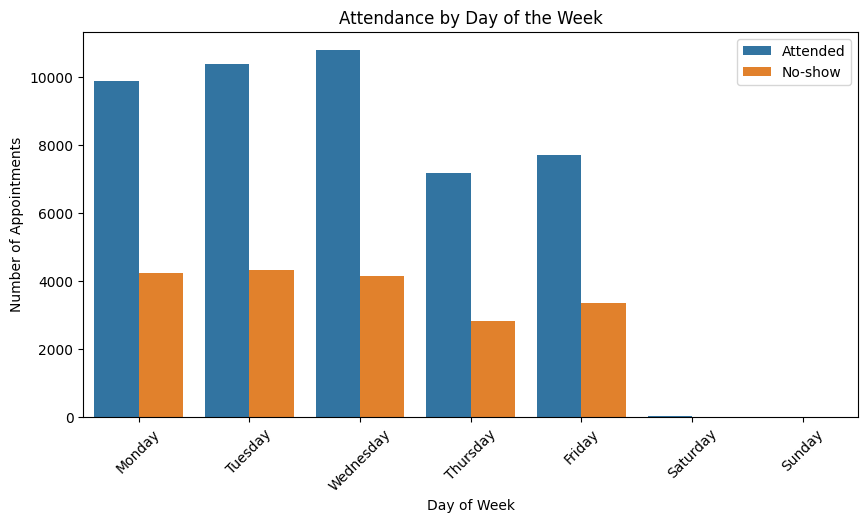

In [27]:
# Appointment Day of Week

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,5))
sns.countplot(x='appointment_weekday', data=df, hue='No-show', order=order)
plt.title("Attendance by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Appointments")
plt.legend(["Attended", "No-show"])
plt.xticks(rotation=45)
plt.show()


The beginning of the week (Mon–Wed) sees the highest patient engagement, but also higher no-show volumes in absolute terms because there are more appointments.
Thursday is the most efficient day (fewer no-shows relative to total appointments).
To improve attendance, focused reminders on Fridays and early-week appointments may be most effective.

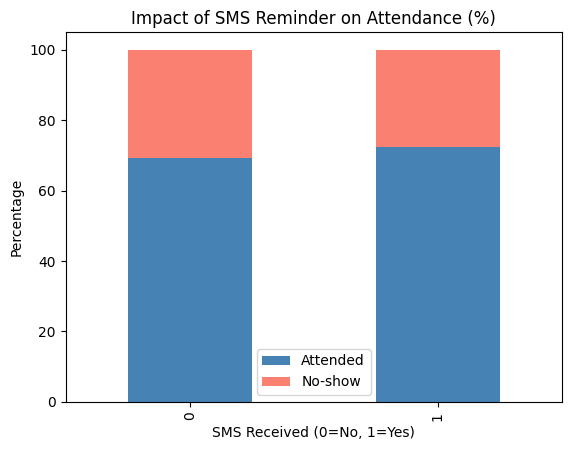

In [39]:
# Impace of SMS Reminder

sms_summary = pd.crosstab(df['SMS_received'], df['No-show'],normalize='index') * 100

sms_summary.plot(kind='bar', stacked=True, color=['steelblue', 'salmon'])
plt.title("Impact of SMS Reminder on Attendance (%)")
plt.ylabel("Percentage")
plt.xlabel("SMS Received (0=No, 1=Yes)")
plt.legend(["Attended", "No-show"])
plt.show()



1. **Patients without SMS reminders (0):**

   * Around **70% attended**, and roughly **30% did not show up**.
   * So, almost **1 in 3 patients missed their appointment** when no SMS was sent.

2. **Patients with SMS reminders (1):**

   * Attendance increased to about **72–74%**, and no-shows dropped to **26–28%**.
   * This means **fewer patients missed appointments** after receiving a reminder.

3. **Overall effect:**

   * The improvement may seem small visually (only a few percentage points), but in healthcare scheduling, even a **2–3% improvement** can translate into **hundreds of additional attended appointments** per month.

---



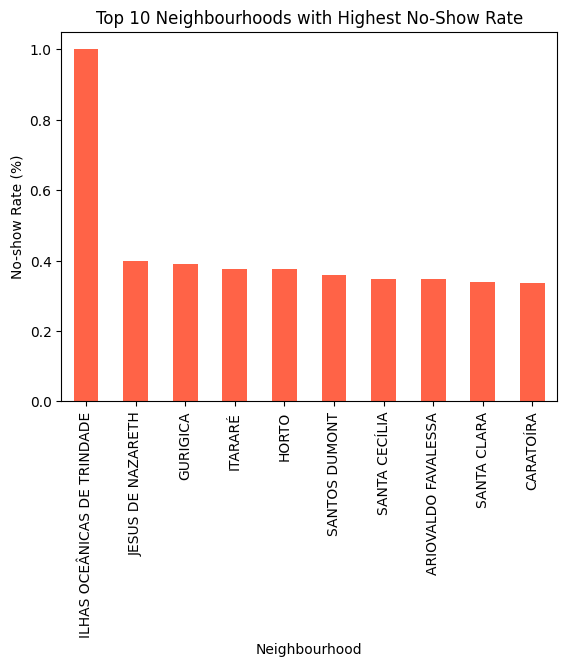

In [40]:
# Neighborhood with highest No-shows

no_show_by_neighbourhood = df.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False)[:10]
no_show_by_neighbourhood.plot(kind='bar', color='tomato')
plt.title("Top 10 Neighbourhoods with Highest No-Show Rate")
plt.ylabel("No-show Rate (%)")
plt.xlabel("Neighbourhood")
plt.show()




> * **Geographical disparities** strongly affect appointment attendance.
> * **ILHAS OCEÂNICAS DE TRINDADE** requires immediate investigation — possibly due to remote location or incorrect data entry.
> * **Targeted outreach** (like localized SMS reminders, transport support, or community awareness campaigns) in the next 5–6 neighbourhoods could **significantly reduce missed appointments**.



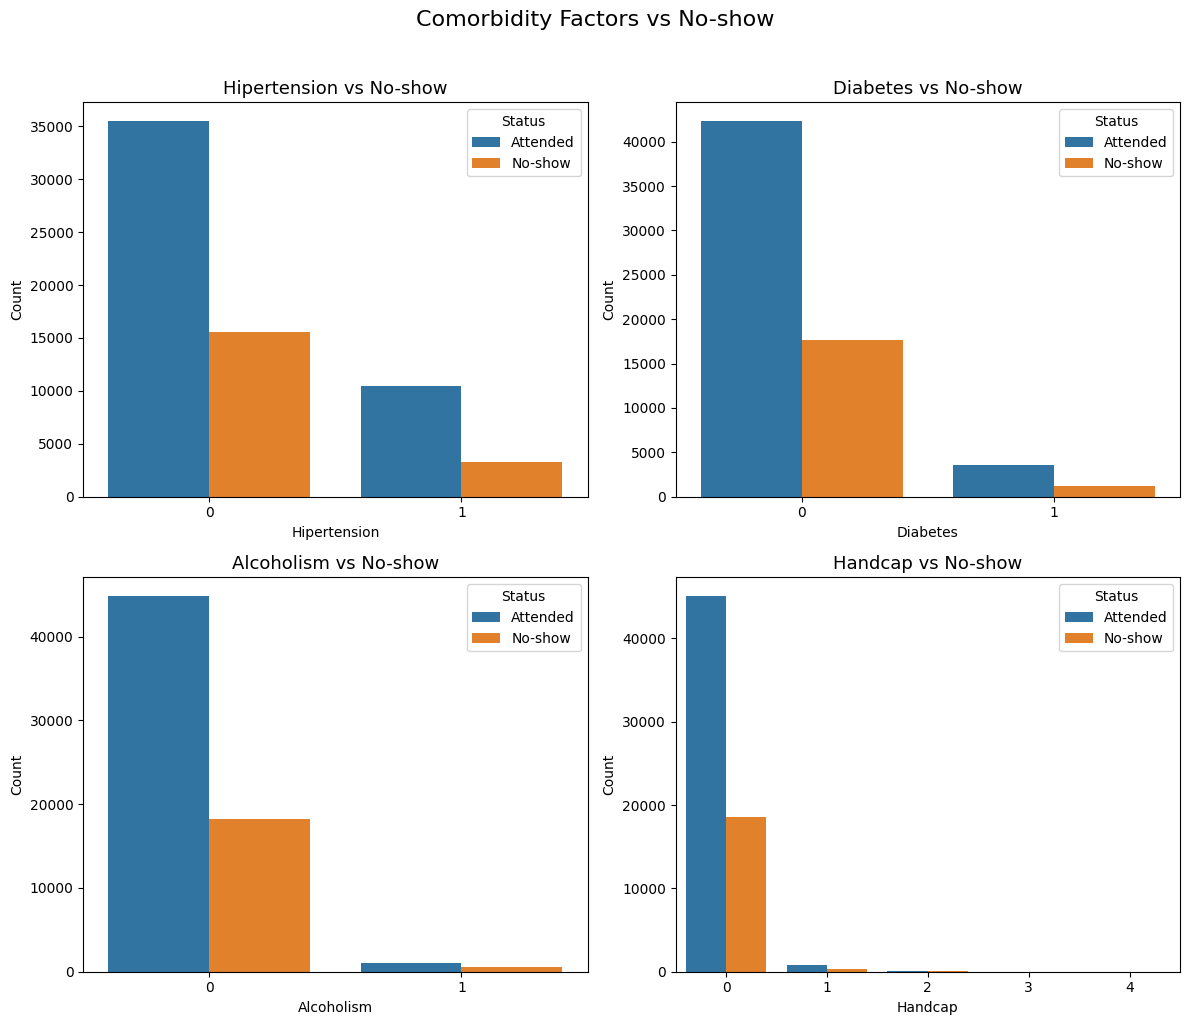

In [42]:
# Comorbidity Factors

health_factors = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comorbidity Factors vs No-show', fontsize=16, y=1.02)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each factor and plot
for i, factor in enumerate(health_factors):
    sns.countplot(x=factor, hue='No-show', data=df, ax=axes[i])
    axes[i].set_title(f"{factor} vs No-show", fontsize=13)
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Status", labels=["Attended", "No-show"])

# Adjust layout
plt.tight_layout()
plt.show()


Patients with chronic diseases like hypertension and diabetes tend to attend more regularly, likely because of the need for ongoing medical management.
Meanwhile, alcoholic and non-chronic patients are more prone to miss appointments, suggesting potential for targeted interventions (like reminders or counseling support).

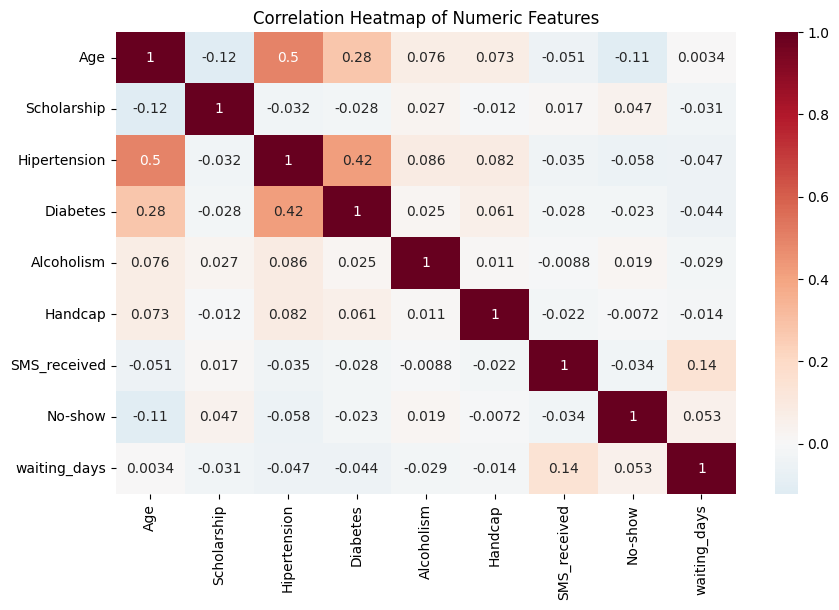

In [43]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


| Feature Pair                | Correlation | Redundancy Action                                                         |
| --------------------------- | ----------- | ------------------------------------------------------------------------- |
| **Age ↔ Hypertension**      | 0.50        | Moderate redundancy — consider keeping one or both if medically important |
| **Hypertension ↔ Diabetes** | 0.42        | Moderate redundancy — may drop one if modeling simplicity preferred       |
| **Age ↔ Diabetes**          | 0.28        | Mild redundancy — usually both can stay                                   |
| Others                      | < 0.15      | No redundancy — safe to keep                                              |


In [45]:
os.makedirs("../reports/", exist_ok=True)
df.describe().to_csv("../reports/data_summary.csv")
print("Summary saved to ../reports/data_summary.csv")


Summary saved to ../reports/data_summary.csv
